## Web scrapping using python

#### References
1. [Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)
2. [Web Scraping using Python](https://www.datacamp.com/community/tutorials/web-scraping-using-python)

In [1]:
# $ python3 -m venv venv
# $ . ./venv/bin/activate

In [2]:
#!pip install --upgrade pip

In [3]:
#Better
!pip install requests BeautifulSoup4 fire


In [1]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys

import fire

In [2]:
#%%writefile ../pyscrap_url.py

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_tag_elements)

In [3]:
res = get_elements('https://africafreak.com/100-most-influential-twitter-users-in-africa', tag='h2')



In [37]:
for i in res[100:]:
    res.remove(i)
    #print(res)
names_infl = []
handle_infl = []
for r in res:
    split_data = r.split('.',maxsplit=1)[1].rsplit('(',maxsplit=1)
    name = split_data[0].split(',')[0].strip()
    handle =  split_data[1].split(')',maxsplit=1)[0]
    names_infl.append(name)
    handle_infl.append(handle)

handle_infl.remove('@andBeyondSafari')
handle_infl.remove('@hurricanevaness')
handle_infl.remove('@BBCKarenAllen')
handle_infl.remove('@drewfhinshaw')
handle_infl.remove('@schneiderhome')
handle_infl.remove('@The_New_Age')
handle_infl.remove('@702JohnRobbie')
han=handle_infl
print(han)


['@gettleman', '@a24media', '@andiMakinana', '@AfricaCheck', '@JamesCopnall', '@oafrica', '@PatrickNgowi', '@StateAfrica', '@Moadow', '@BrendanSAfrica', '@CityTshwane', '@VISI_Mag', '@ThisIsAfricaTIA', '@sarzss', '@TheEIU_Africa', '@InvestInAfrica', '@malonebarry', '@artsouthafrica', '@KahnMorbee', '@JamalMOsman', '@iamsuede', '@mikestopforth', '@equal_education', '@t_mcconnell', '@forbeesta', '@jaxpanik', '@thisisafrica', '@audisouthafrica', '@ONEinAfrica', '@Hamza_Africa', '@africatechie', '@cx73', '@ayittey', '@MercedesBenz_SA', '@africagathering', '@okayafrica', '@mary_harper', '@savetherhino', '@africamedia_CPJ', '@TechCentral', '@GautengProvince', '@Aynte', '@daniel_howden', '@rangerdiaries', '@TheStar_news', '@Afrinnovator', '@theafricareport', '@CityofJoburgZA', '@ThinkAfricaFeed', '@AfricaGoodNews', '@willintune', '@cnbcafrica', '@MadeItInAfrica', '@AfricaResearch', '@FoodBlogCT', '@MbuyiseniNdlozi', '@africaprogress', '@IFCAfrica', '@HenleyAfrica', '@geoffreyyork', '@Entrepre

In [9]:
df_influencer_handle = pd.DataFrame(handle_infl, columns=["100 influencers handles"])
df_influencer_handle.to_csv('C:/Users/HP/Desktop/CV, P.Statement and others/10 Academy/100_handles.csv', index=False, header=True)
print(df_influencer_handle)

   100 influencers handles
0               @gettleman
1                @a24media
2            @andiMakinana
3             @AfricaCheck
4            @JamesCopnall
5                 @oafrica
6            @PatrickNgowi
7             @StateAfrica
8                  @Moadow
9          @BrendanSAfrica
10            @CityTshwane
11               @VISI_Mag
12        @ThisIsAfricaTIA
13                 @sarzss
14          @TheEIU_Africa
15         @InvestInAfrica
16            @malonebarry
17         @artsouthafrica
18             @KahnMorbee
19            @JamalMOsman
20               @iamsuede
21          @mikestopforth
22        @equal_education
23            @t_mcconnell
24              @forbeesta
25               @jaxpanik
26           @thisisafrica
27        @audisouthafrica
28            @ONEinAfrica
29           @Hamza_Africa
..                     ...
63                @art2gee
64          @JendayiFrazer
65            @PeterGreste
66              @NDOCKenya
67          @Mo_IbrahimFdn
6

In [10]:
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = simple_get(url)

In [11]:
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = get(url).content
re_gov = get_elements(response, tag='blockquote')
names = []
handles = []
for r in re_gov:
    split_data = r.split('— ',maxsplit=1)[1].rsplit('(',maxsplit=1)
    name = split_data[0].split(',')[0].strip()
    handle =  split_data[1].rsplit(')',maxsplit=1)[0]
    names.append(name)
    handles.append(handle)

#nam_handle = f'{name}:{handle}'

df_gov_handle = pd.DataFrame(handles, columns=["Gov influencers handles"])
df_gov_handle.to_csv('C:/Users/HP/Desktop/CV, P.Statement and others/10 Academy/gov_handles.csv', index=False, header=True)
print(df_gov_handle)

   Gov influencers handles
0         @EswatiniGovern1
1              @MalawiGovt
2             @hagegeingob
3               @FinanceSC
4            @PresidencyZA
5               @mohzambia
6             @edmnangagwa
7              @MinSantedj
8                 @hawelti
9         @StateHouseKenya
10             @PaulKagame
11             @M_Farmaajo
12          @SouthSudanGov
13          @SudanPMHamdok
14         @TZSpokesperson
15         @KagutaMuseveni
16           @angola_Mirex
17          @willynyamitwe
18              @Cherif_MZ
19         @Presidence_RDC
20           @PresidentABO
21        @PresidenceBenin
22           @rochkaborepf
23          @PresidenciaCV
24         @AOuattara_PRCI
25         @Presidency_GMB
26             @NAkufoAddo
27           @President_GN
28               @USEmbalo
29         @PresidenceMali
30        @CheikhGhazouani
31            @IssoufouMhm
32                @MBuhari
33             @Macky_Sall
34           @PresidentBio
35              @MSPS_Togo


In [44]:
fl_handles = handles + han
print(fl_handles)
final_handle = pd.DataFrame(fl_handles, columns=["combined_handles"])
final_handle.to_csv (r'C:\Users\HP\Desktop\CV, P.Statement and others\10 Academy\final_handle.csv', index = False, header=True)
#print(final_handle)


['@EswatiniGovern1', '@MalawiGovt', '@hagegeingob', '@FinanceSC', '@PresidencyZA', '@mohzambia', '@edmnangagwa', '@MinSantedj', '@hawelti', '@StateHouseKenya', '@PaulKagame', '@M_Farmaajo', '@SouthSudanGov', '@SudanPMHamdok', '@TZSpokesperson', '@KagutaMuseveni', '@angola_Mirex', '@willynyamitwe', '@Cherif_MZ', '@Presidence_RDC', '@PresidentABO', '@PresidenceBenin', '@rochkaborepf', '@PresidenciaCV', '@AOuattara_PRCI', '@Presidency_GMB', '@NAkufoAddo', '@President_GN', '@USEmbalo', '@PresidenceMali', '@CheikhGhazouani', '@IssoufouMhm', '@MBuhari', '@Macky_Sall', '@PresidentBio', '@MSPS_Togo', '@gettleman', '@a24media', '@andiMakinana', '@AfricaCheck', '@JamesCopnall', '@oafrica', '@PatrickNgowi', '@StateAfrica', '@Moadow', '@BrendanSAfrica', '@CityTshwane', '@VISI_Mag', '@ThisIsAfricaTIA', '@sarzss', '@TheEIU_Africa', '@InvestInAfrica', '@malonebarry', '@artsouthafrica', '@KahnMorbee', '@JamalMOsman', '@iamsuede', '@mikestopforth', '@equal_education', '@t_mcconnell', '@forbeesta', '@ja

In [30]:
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

import matplotlib.dates as mdates
import seaborn as sns
#sns.set()


# to view all columns
#pd.set_option("display.max.columns", None)

In [31]:
#!pip install tweepy
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [32]:
consumer_key = "K8W2HpecQElw6KgwuVHeo2yam"
consumer_secret = "nefpW8qOYBcWxvW31FbnctvfhT7JdxbAomapRsfflDuTMyjbR6"
access_token = "994261917253472256-9Pr2nCD3YbPSS7spfTIM2azickdWaOd"
access_token_secret = "g4k7BxSZKaPncIExbAAz6YUOrjl8Cq5NNcpLq8axpbsUp"

In [33]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [22]:
#getting tweets
tweets = []
tweetCount=5
for i in fl_handles:
    try:
        results=api.user_timeline(id=i, count=tweetCount)
    except tweepy.TweepError as e:
                continue  
    for tweet in results:
        tweets.append(tweet.text)
#print(tweets)




In [49]:
# getting followers for 100 influencers
# Calling the get_user function with our parameters
followers = []
for i in handles:
    try:
        results = api.get_user(id=i)
    except tweepy.TweepError as e:
        continue 
    followers.append(results.followers_count)
    #print(results.followers_count)
print(followers)





[11447, 39629, 193431, 128, 1606819, 7284, 549399, 2959, 66904, 1108024, 1994578, 427048, 2587, 374588, 4092, 1823802, 3283, 107647, 19081, 344060, 174778, 30343, 257677, 3293, 839005, 10880, 1516665, 777, 8504, 229984, 31878, 117047, 3285395, 1381278, 15388, 1142]


In [50]:
# followers dataframe
total_followers = pd.DataFrame(followers,columns=["Number of followers"])
total_followers.to_csv('C:/Users/HP/Desktop/CV, P.Statement and others/10 Academy/gov_follower.csv')
#print(total_followers.head())
#print(total_followers)

   Number of followers
0                11447
1                39629
2               193431
3                  128
4              1606819
    Number of followers
0                 11447
1                 39629
2                193431
3                   128
4               1606819
5                  7284
6                549399
7                  2959
8                 66904
9               1108024
10              1994578
11               427048
12                 2587
13               374588
14                 4092
15              1823802
16                 3283
17               107647
18                19081
19               344060
20               174778
21                30343
22               257677
23                 3293
24               839005
25                10880
26              1516665
27                  777
28                 8504
29               229984
30                31878
31               117047
32              3285395
33              1381278
34                1538

In [51]:
# getting no of likes for gov influencers
likes = []
for i in handles:
    try:
        results = api.get_user(id=i)
    except tweepy.TweepError as e:
        continue
    likes.append(results.favourites_count)
    #print(results.followers_count)
#print(likes)
total_like = pd.DataFrame(likes,columns=["Number of likes"])
#total_like.to_csv('C:/Users/HP/Desktop/CV, P.Statement and others/10 Academy/gov_likes.csv')
print(total_like.head())



   Number of likes
0               64
1              915
2              268
3               12
4               64


In [52]:
total_like

,Number of likes
0,64
1,915
2,268
3,12
4,64
5,163
6,65
7,591
8,739
9,61


In [55]:
# getting no of following for 100 influencers
following = []
for i in fl_handles:
    try:
        results = api.get_user(id=i)
    except tweepy.TweepError as e:
        continue
    following.append(results.friends_count)

    
#print(following)
gov_following = pd.DataFrame(following,columns=["Number of following"])
#gov_following.to_csv('C:/Users/HP/Desktop/CV, P.Statement and others/10 Academy/gov_followings.csv')
print(gov_following.head())



   Number of following
0                   83
1                   26
2                   55
3                  224
4                   14


In [53]:
#getting retweets
no_of_retweets = []
for id in handles:
    try:
        tweets = tweepy.Cursor(api.user_timeline, id=i).items(200)
        rt = 0
        for tweet in tweets:
            rt+=tweet.retweet_count
            no_of_retweets.append(rt)
    except tweepy.TweepError as e:
        continue
#print(no_of_retweets)

#retweets dataframe
gov_retweets = pd.DataFrame(no_of_retweets, columns=["No of retweets"])
#gov_retweets.to_csv (r'C:\Users\HP\Desktop\CV, P.Statement and others\10 Academy\gov_retweet.csv', index = False, header=True)
print(gov_retweets.head())


   No of retweets
0              10
1              24
2              34
3              50
4              50


In [54]:
gov_retweets

,No of retweets
0,10
1,24
2,34
3,50
4,50
5,67
6,73
7,76
8,78
9,81


In [61]:
#getting no of tweets shared
no_tweets_shared = []
for i in fl_handles:
    try:
        results = api.get_user(id=i)
    except tweepy.TweepError as e:
        continue
    no_tweets_shared.append(results.statuses_count)
    
print(no_tweets_shared)

#tweet shared dataframe
gov_statuses = pd.DataFrame(no_tweets_shared, columns=["No of statuses"])
#gov_statuses.to_csv (r'C:\Users\HP\Desktop\CV, P.Statement and others\10 Academy\gov_statuses.csv', index = False, header=True)
print(gov_statuses.head())

[1676, 4030, 1087, 125, 18881, 838, 628, 1065, 4720, 9052, 2862, 599, 209, 654, 836, 6645, 732, 40682, 753, 1650, 1738, 5649, 4496, 715, 7139, 1442, 7098, 21, 828, 11168, 30, 349, 4734, 2796, 83, 44, 3770, 16869, 142234, 27325, 19439, 6864, 1638, 1, 21549, 3892, 81209, 16890, 23988, 2166, 2523, 2814, 35271, 23, 4983, 13508, 88730, 42971, 26785, 15627, 9575, 15410, 0, 22996, 7579, 17748, 101356, 4986, 12766, 15755, 8771, 45455, 7187, 35783, 35, 18373, 33461, 14516, 8767, 3906, 48601, 32731, 15893, 265302, 16251, 11100, 8562, 91479, 30378, 23204, 137304, 35978, 10665, 8895, 38395, 53788, 117, 9294, 23704, 13353, 3118, 14757, 3243, 11275, 27253, 14684, 9266, 6476, 1, 21728, 50980, 23587, 27798, 15681, 6, 4555, 20000, 88551, 56044, 45134, 5688, 62843, 144320, 72335, 37220, 322930, 19, 31626, 11186]
   No of statuses
0            1676
1            4030
2            1087
3             125
4           18881


In [71]:
#mention for gov influencers
count = []
for x in range(0, len(fl_handles)):
    name = fl_handles[x]
    mentions_count = []
    try:
       for status in tweepy.Cursor(api.user_timeline, id=name).items():
         entities = status.entities
         if "user_mentions" in entities:
            for ent in entities["user_mentions"]:
              if ent is not None:
                if "screen_name" in ent:
                  name = ent["screen_name"]
                  if name is not None:
                    mentions_count.append(name)
    except tweepy.TweepError as e:
        continue
    count.append(len(mentions_count))
infl_mention = pd.DataFrame(count, columns=["gov mentions"])
#infl_mention.to_csv (r'C:\Users\HP\Desktop\CV, P.Statement and others\10 Academy\infl_mentions.csv', index = False, header=True)
print(infl_mention.head())

   gov mentions
0           117
1          1699
2           253
3            32
4          1054


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x='gov mentions', data=infl_mention, kind='bar')
plt.xticks(rotation=90)
plt.show()

In [68]:
hashtags=[]
if len(fl_handles) > 0:
    for handle in fl_handles:
        value_list = {}
        #print("Getting hashtags for " + handle)
        # this helps avoid Tweepy errors like suspended users or user not found errors
        try:
            for status in tweepy.Cursor(api.user_timeline, id=handle).items():
                if hasattr(status, "entities"):
                    entities = status.entities
                    if 'hashtags' in entities:
                        for ent in entities['hashtags']:
                            if ent is not None:
                                if "text" in ent:
                                    hashtag = ent["text"]
                                    if hashtag is not None:
                                        hashtags.append(hashtag)
        except tweepy.TweepError as e:
            continue
print(hashtags)
infl_hashtag = pd.DataFrame(hashtags, columns=["gov mentions"])
print(infl_hashtag)


                    

['COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'HIV', 'HIV', 'Eswatini', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'COVID19', 'WorldRefugeeDay', 'COVID19', 'COVID19', 'COVID19', 'COVID19

In [69]:
hashtags = [item.lower() for item in hashtags]
print(hashtags)
from collections import Counter
highest_number = Counter(hashtags)
print(highest_number)

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

#to convert highest_nmber dict to dataframe
df = pd.DataFrame(highest_number.items(), columns=["hashtags","number of count"])
print(df.head(10))
df_sort = df.sort_values('number of count', ascending=False).head(20)
print(df_sort)

['covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'hiv', 'hiv', 'eswatini', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'covid19', 'worldrefugeeday', 'covid19', 'covid19', 'covid19', 'covid19

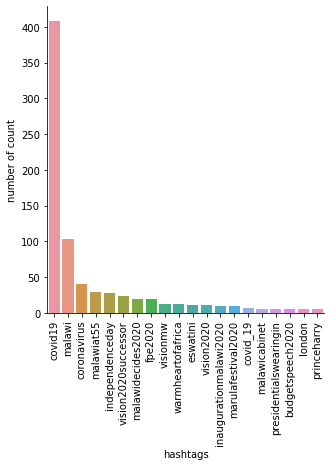

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x='hashtags',y='number of count', data=df_sort, kind='bar')
plt.xticks(rotation=90)
plt.show()

### Popularity reach
### Reach Score
### Relevance Score

In [63]:
#popularity reach = retweets + likes
popularity = pd.concat([gov_retweets,total_like,df_gov_handle], axis=1)
#print(popularity)
popularity["Popularity_score"] = popularity["No of retweets"]+popularity["Number of likes"]
print(popularity.head())





   No of retweets  Number of likes Gov influencers handles  Popularity_score
0              10             64.0        @EswatiniGovern1              74.0
1              24            915.0             @MalawiGovt             939.0
2              34            268.0            @hagegeingob             302.0
3              50             12.0              @FinanceSC              62.0
4              50             64.0           @PresidencyZA             114.0


In [65]:
popularity.sort_values("Popularity_score", ascending=False).head()

,No of retweets,Number of likes,Gov influencers handles,Popularity_score
17,100,6264.0,@willynyamitwe,6364.0
28,112,6063.0,@USEmbalo,6175.0
29,113,1732.0,@PresidenceMali,1845.0
1,24,915.0,@MalawiGovt,939.0
8,78,739.0,@hawelti,817.0


In [66]:
#Reach Score = followers - following
reach = pd.concat([total_followers,gov_following,df_gov_handle], axis=1)
reach['reach_score']= reach["Number of followers"] - reach["Number of following"]
print(reach.head()) 


   Number of followers  Number of following Gov influencers handles  \
0              11447.0                   83        @EswatiniGovern1   
1              39629.0                   26             @MalawiGovt   
2             193431.0                   55            @hagegeingob   
3                128.0                  224              @FinanceSC   
4            1606819.0                   14           @PresidencyZA   

   reach_score  
0      11364.0  
1      39603.0  
2     193376.0  
3        -96.0  
4    1606805.0  


In [67]:
reach.sort_values("reach_score", ascending=False).head()

,Number of followers,Number of following,Gov influencers handles,reach_score
32,3285395.0,26,@MBuhari,3285369.0
10,1994578.0,181,@PaulKagame,1994397.0
15,1823802.0,28,@KagutaMuseveni,1823774.0
4,1606819.0,14,@PresidencyZA,1606805.0
26,1516665.0,354,@NAkufoAddo,1516311.0


## Web scrapping using bash script
If the web site has a quite simple HTML, you can easily use curl to perform the request and then extract the needed values using bash commands grep, cut , sed, ..

This tutorial is adapted from [this](https://medium.com/@LiliSousa/web-scraping-with-bash-690e4ee7f98d) medium article

In [ ]:
%%bash 

# curl the page and save content to tmp_file
#url = "https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa"
#curl -X GET $url -o tmp_file


#!/bin/bash

# write headers to CSV file
echo "Name, twitter_id" >> extractData.csv
n="1"
while [ $n -lt 2 ]
do
  
  #get title
  title=$(cat tmp_file | grep "class=\"twitter-tweet\"" | cut -d ';' -f1 )
  echo $title
  #get author
  #twitter_id=$(cat tmp_file |grep -A1 "class=\"css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0\"" | tail -1)

  #echo "$title, $twitter_id" >> extractData.csv
  #echo "$title, $twitter_id"
    
  n=$[$n+1]

done